## Loading the Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

## Load the Data

In [2]:
credit_data = pd.read_csv("C:/Users/91629/Desktop/7th Sem/MBA786M/Project/Credit.csv")
credit_data.shape

(1000, 62)

In [3]:
credit_data.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,...,0,0,1,0,0,1,0,0,1,0


In [4]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Duration                                1000 non-null   int64 
 1   Amount                                  1000 non-null   int64 
 2   InstallmentRatePercentage               1000 non-null   int64 
 3   ResidenceDuration                       1000 non-null   int64 
 4   Age                                     1000 non-null   int64 
 5   NumberExistingCredits                   1000 non-null   int64 
 6   NumberPeopleMaintenance                 1000 non-null   int64 
 7   Telephone                               1000 non-null   int64 
 8   ForeignWorker                           1000 non-null   int64 
 9   Class                                   1000 non-null   object
 10  CheckingAccountStatus.lt.0              1000 non-null   int64 
 11  Check

In [5]:
#   Only the column named 'Class' is of object type
for colname, dtype in credit_data.dtypes.items():
    if dtype == 'object':
        print(colname)

Class


In [6]:
numerical_variables = ['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration', 'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance']

In [7]:
#   We can say ( as per the data description) that the following are categorical variables
categorical = []

for colname in credit_data.columns:
    if colname not in numerical_variables:
        print(colname)
        categorical.append(colname)
        print(credit_data[colname].unique())
        print()
        print('-'*100)

Telephone
[0 1]

----------------------------------------------------------------------------------------------------
ForeignWorker
[1 0]

----------------------------------------------------------------------------------------------------
Class
['Good' 'Bad']

----------------------------------------------------------------------------------------------------
CheckingAccountStatus.lt.0
[1 0]

----------------------------------------------------------------------------------------------------
CheckingAccountStatus.0.to.200
[0 1]

----------------------------------------------------------------------------------------------------
CheckingAccountStatus.gt.200
[0 1]

----------------------------------------------------------------------------------------------------
CheckingAccountStatus.none
[0 1]

----------------------------------------------------------------------------------------------------
CreditHistory.NoCredit.AllPaid
[0 1]

-----------------------------------------------------

In [8]:
print(categorical)
print(len(categorical))

['Telephone', 'ForeignWorker', 'Class', 'CheckingAccountStatus.lt.0', 'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200', 'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid', 'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly', 'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar', 'Purpose.UsedCar', 'Purpose.Furniture.Equipment', 'Purpose.Radio.Television', 'Purpose.DomesticAppliance', 'Purpose.Repairs', 'Purpose.Education', 'Purpose.Vacation', 'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other', 'SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500', 'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000', 'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1', 'EmploymentDuration.1.to.4', 'EmploymentDuration.4.to.7', 'EmploymentDuration.gt.7', 'EmploymentDuration.Unemployed', 'Personal.Male.Divorced.Seperated', 'Personal.Female.NotSingle', 'Personal.Male.Single', 'Personal.Male.Married.Widowed', 'Personal.Female.Si

In [9]:
for colname in credit_data.columns:
    if colname in numerical_variables:
        print(colname)
        print(credit_data[colname].unique())
        print()
        print('-'*100)

Duration
[ 6 48 12 42 24 36 30 15  9 10  7 60 18 45 11 27  8 54 20 14 33 21 16  4
 47 13 22 39 28  5 26 72 40]

----------------------------------------------------------------------------------------------------
Amount
[ 1169  5951  2096  7882  4870  9055  2835  6948  3059  5234  1295  4308
  1567  1199  1403  1282  2424  8072 12579  3430  2134  2647  2241  1804
  2069  1374   426   409  2415  6836  1913  4020  5866  1264  1474  4746
  6110  2100  1225   458  2333  1158  6204  6187  6143  1393  2299  1352
  7228  2073  5965  1262  3378  2225   783  6468  9566  1961  6229  1391
  1537  1953 14421  3181  5190  2171  1007  1819  2394  8133   730  1164
  5954  1977  1526  3965  4771  9436  3832  5943  1213  1568  1755  2315
  1412 12612  2249  1108   618  1409   797  3617  1318 15945  2012  2622
  2337  7057  1469  2323   932  1919  2445 11938  6458  6078  7721  1410
  1449   392  6260  7855  1680  3578  7174  2132  4281  2366  1835  3868
  1768   781  1924  2121   701   639  1860  3499  

In [10]:
print(numerical_variables)
print(len(numerical_variables))

['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration', 'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance']
7


#### **Problem-I:**

In the above `Categorical` features analysis, we observe that columns like:-
- Personal.Female.Single
- Purpose.vacation

have only one class present. All the data values in these two columns are the same. So, the particular columns don't carry any variance in the data and are constant. Thus, theoretically, not using those columns also won't harm our model. So, ideally we should have dropped those two columns from the data and then fitted our model. However, it is not done so here.

**As majority of our variables are categorical variables, and as even our dependent variable is also a categorical variable; thus one of the best model to be fitted here must be `CatBoost`; as it has support for handling a large number of categorical variables and then forming an ensemble of predictors in the form of Decision Trees.**  

#### Binary encoding the `Class` variable

In [11]:
credit_data['Class'] = credit_data['Class'].apply(lambda x: 0 if x == 'Bad' else 1)
np.sum(credit_data['Class'])

700

In [12]:
#   Just re-arranging our columns
cols = [col for col in credit_data.columns if col != 'Class']
cols.append('Class')
credit_data = credit_data[cols]

## Question-I: Logistic Regression

- Our dependent variable is `Class` and it differentiates customers, on their observed credit 
performance, as either Good or Bad
- All of the rest of the variables are independent variables

So we prepare our data accordingly

In [13]:
X = credit_data.drop('Class', axis=1)
y = credit_data['Class']

**Suggestion: Don't we need to one-hot encode the Categorical Variables?**

In [14]:
X.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,0,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0


In [15]:
y.head()

0    1
1    0
2    1
3    1
4    0
Name: Class, dtype: int64

In [16]:
print(X.shape, y.shape)

(1000, 61) (1000,)


#### Part-a:-

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
lr_model_1 = LogisticRegression(max_iter=int(1e8))
lr_model_1.fit(X, y)

LogisticRegression(max_iter=100000000)

In [19]:
lr_preds_probs_1 = lr_model_1.predict_proba(X)

In [20]:
#   The 1st column shows probability of Class: Bad (0)
#   The 2nd column shows probability of Class: Good (1)
#   Sum of them will always be 1

lr_preds_probs_1

array([[0.03761138, 0.96238862],
       [0.62621134, 0.37378866],
       [0.02832739, 0.97167261],
       ...,
       [0.08297964, 0.91702036],
       [0.65699189, 0.34300811],
       [0.18401625, 0.81598375]])

In [21]:
#   We proceed to continue with the Class 1 probability
lr_preds_probs_1 = lr_preds_probs_1[:,1]
credit_data['Predicted_Probs'] = lr_preds_probs_1

In [22]:
credit_data.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified,Class,Predicted_Probs
0,6,1169,4,4,67,2,1,0,1,1,...,1,0,1,0,0,0,1,0,1,0.962389
1,48,5951,2,2,22,1,1,1,1,0,...,1,0,1,0,0,0,1,0,0,0.373789
2,12,2096,2,3,49,1,2,1,1,0,...,1,0,1,0,0,1,0,0,1,0.971673
3,42,7882,2,4,45,1,2,1,1,1,...,1,0,0,1,0,0,1,0,1,0.710001
4,24,4870,3,4,53,2,2,1,1,1,...,1,0,0,1,0,0,1,0,0,0.255066


#### Create a Confusion Matrix

Training and Making Predictions on the Same Data :(

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
threshold_1 = 0.2
credit_data['Predictions_0.2'] = np.where(credit_data['Predicted_Probs'] > threshold_1, 1, 0)
cm_1 = confusion_matrix(y_pred=credit_data['Predictions_0.2'], y_true=credit_data['Class'])
print(cm_1)

[[ 40 260]
 [  4 696]]


In [25]:
TN, FP, FN, TP = cm_1.ravel()

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
Acc = (TP + TN)/ (TP + TN + FP + FN) 

print(f"True Positive Rate for a threshold of {threshold_1} is: {TPR}")
print(f"False Positive Rate for a threshold of {threshold_1} is: {FPR}")
print(f"Accuracy score is: {Acc}")

True Positive Rate for a threshold of 0.2 is: 0.9942857142857143
False Positive Rate for a threshold of 0.2 is: 0.8666666666666667
Accuracy score is: 0.736


In [26]:
threshold_2 = 0.35
credit_data['Predictions_0.35'] = np.where(credit_data['Predicted_Probs'] > threshold_2, 1, 0)
cm_2 = confusion_matrix(y_pred=credit_data['Predictions_0.35'], y_true=credit_data['Class']) 
print(cm_2)

[[ 95 205]
 [ 23 677]]


In [27]:
TN, FP, FN, TP = cm_2.ravel()

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
Acc = (TP + TN)/ (TP + TN + FP + FN) 

print(f"True Positive Rate for a threshold of {threshold_2} is: {TPR}")
print(f"False Positive Rate for a threshold of {threshold_2} is: {FPR}")
print(f"Accuracy score is: {Acc}")

True Positive Rate for a threshold of 0.35 is: 0.9671428571428572
False Positive Rate for a threshold of 0.35 is: 0.6833333333333333
Accuracy score is: 0.772


In [28]:
threshold_3 = 0.5
credit_data['Predictions_0.5'] = np.where(credit_data['Predicted_Probs'] > threshold_3, 1, 0)
cm_3 = confusion_matrix(y_pred=credit_data['Predictions_0.5'], y_true=credit_data['Class'])
print(cm_3)

[[157 143]
 [ 71 629]]


In [29]:
TN, FP, FN, TP = cm_3.ravel()

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN) 
Acc = (TP + TN)/ (TP + TN + FP + FN)

print(f"True Positive Rate for a threshold of {threshold_3} is: {TPR}")
print(f"False Positive Rate for a threshold of {threshold_3} is: {FPR}")
print(f"Accuracy score is: {Acc}")

True Positive Rate for a threshold of 0.5 is: 0.8985714285714286
False Positive Rate for a threshold of 0.5 is: 0.4766666666666667
Accuracy score is: 0.786


ROC curve of the model:-

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score

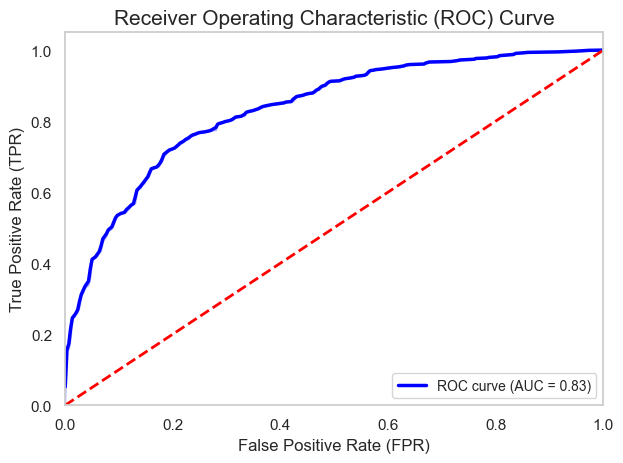

In [31]:
fpr, tpr, thresholds = roc_curve(credit_data['Class'], credit_data['Predicted_Probs'])
auc = roc_auc_score(credit_data['Class'], credit_data['Predicted_Probs'])

# Set Seaborn style
sns.set(style='whitegrid')

# Plot ROC curve
sns.lineplot(x=fpr, y=tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})', linewidth=2.5)

# Plot diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)

# Add labels and title with better formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])  # Slightly extend y-axis for aesthetics
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)

# Add a legend
plt.legend(loc="lower right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.grid(False)
plt.show()

The ROC curve above shows the variation of False Positive Rates(FPR) vs the True Positive Rates(TPR). The graph clearly mentions that AUC = 0.83 (AUC > 0.5), which indicates the model was able to capture the patterns underlying from this dataset.

Now, if we compare the performance of our model based on the three thresholds, it is clear that the accuracy with threshold as 0.5 is the highest (0.78). 

Plot of Error Rate and False Negative Rate (FNR) vs threshold for Logistic Regression

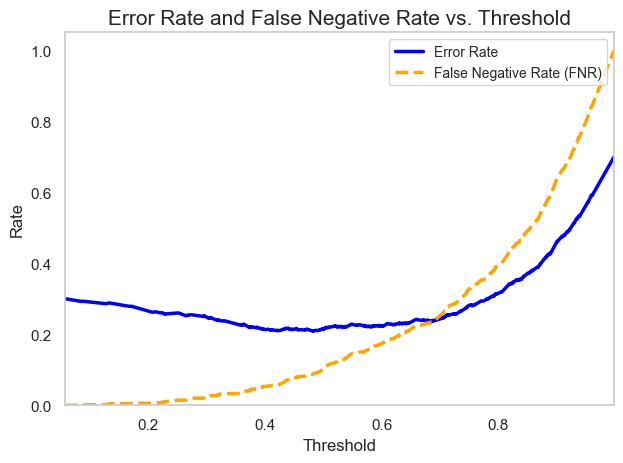

In [32]:
fpr, tpr, thresholds = roc_curve(credit_data['Class'], credit_data['Predicted_Probs'])

# Error rate is 1 - accuracy
# Accuracy = (TPR * P + (1 - FPR) * N) / Total
n_positives = credit_data['Class'].sum()  # Number of positives (P)
n_negatives = len(credit_data) - n_positives  # Number of negatives (N)
accuracy = (tpr * n_positives + (1 - fpr) * n_negatives) / len(credit_data)
error_rate = 1 - accuracy

# False Negative Rate (FNR) is 1 - TPR
fnr = 1 - tpr

# Sanity check: Remove any NaN or Inf values from both arrays
valid_indices = np.isfinite(error_rate) & np.isfinite(thresholds)

# Set Seaborn style
sns.set(style='whitegrid')

# Plot Error Rate
sns.lineplot(x=thresholds[valid_indices], y=error_rate[valid_indices], color='blue', label='Error Rate', linewidth=2.5)

# Plot False Negative Rate (FNR) in a dashed line
sns.lineplot(x=thresholds[valid_indices], y=fnr[valid_indices], color='orange', label='False Negative Rate (FNR)', linestyle='--', linewidth=2.5)

# Add labels and title with better formatting
plt.xlim([thresholds[valid_indices].min(), thresholds[valid_indices].max()])
plt.ylim([0.0, 1.05])
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Rate', fontsize=12)
plt.title('Error Rate and False Negative Rate vs. Threshold', fontsize=15)

# Add a legend
plt.legend(loc="upper right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.grid(False)
plt.show()

Thus the above plot shows that the threshold must be set in a way such that both the error rate and the False Negative Rate (which is an important metric in credit risk modelling), must be as low as possible. Thus, we could confidently say that the threshold of 0.5 will prvide us with the best model. 

But we must remember that we have trained and tested our model on the same data. So, this will not show how our model generalizes to new data or observations. Thus, any claims made in this way from this model, will be errornious in our situation. 

In [33]:
%reset -f

#### Part-b:-

In [34]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [35]:
credit_data = pd.read_csv("C:/Users/91629/Desktop/7th Sem/MBA786M/Project/Credit.csv")
print(credit_data.shape)

#   Binary Encoding the Class variable
credit_data['Class'] = credit_data['Class'].apply(lambda x: 0 if x == 'Bad' else 1)
print(f"No. of transactions classified as good (marked as 1): {np.sum(credit_data['Class'])}")     

(1000, 62)
No. of transactions classified as good (marked as 1): 700


In [36]:
cols = [col for col in credit_data.columns if col != 'Class']
cols.append('Class')
credit_data = credit_data[cols]

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(credit_data.drop("Class", axis=1), 
                                                    credit_data["Class"], 
                                                    test_size=0.3, 
                                                    random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 61) (300, 61) (700,) (300,)


In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
#   Training our model explicitely on the training data and not on the entire dataset
lr_model_2 = LogisticRegression(max_iter=int(1e8))
lr_model_2.fit(X_train, y_train)

#   Predicting explicitely on the test dataset
lr_preds_probs_2 = lr_model_2.predict_proba(X_test)

In [41]:
#   We proceed to continue with the Class 1 probability
# lr_preds_probs_2 = lr_preds_probs_2[:,1]
# credit_data['Predicted_Probs'] = lr_preds_probs_2

In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
threshold_1 = 0.2
lr_pred_t1 = np.where(lr_preds_probs_2[:,1] > threshold_1, 1, 0)
CM_1 = confusion_matrix(y_pred=lr_pred_t1, y_true=y_test)
FNR_1 = CM_1[1,0]
print(CM_1)


TN, FP, FN, TP = CM_1.ravel()

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN) 
ACC = (TP + TN) / (TP + TN + FP + FN)

print(f"True Positive Rate for a threshold of {threshold_1} is: {TPR}")
print(f"False Positive Rate for a threshold of {threshold_1} is: {FPR}")
print(f"False Negative Rate for a threshold of {threshold_1} is: {FNR_1/300}")
print(f"Accuracy is: {ACC}")

[[  9  82]
 [  1 208]]
True Positive Rate for a threshold of 0.2 is: 0.9952153110047847
False Positive Rate for a threshold of 0.2 is: 0.9010989010989011
False Negative Rate for a threshold of 0.2 is: 0.0033333333333333335
Accuracy is: 0.7233333333333334


In [44]:
threshold_2 = 0.35
lr_pred_t2 = np.where(lr_preds_probs_2[:,1] > threshold_2, 1, 0)
CM_2 = confusion_matrix(y_pred=lr_pred_t2, y_true=y_test)
FNR_2 = CM_2[1,0]
print(CM_2)


TN, FP, FN, TP = CM_2.ravel()

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN) 
ACC = (TP + TN) / (TP + TN + FP + FN)

print(f"True Positive Rate for a threshold of {threshold_2} is: {TPR}")
print(f"False Positive Rate for a threshold of {threshold_2} is: {FPR}")
print(f"False Negative Rate for a threshold of {threshold_2} is: {FNR_2/300}")
print(f"Accuracy is: {ACC}")

[[ 25  66]
 [ 10 199]]
True Positive Rate for a threshold of 0.35 is: 0.9521531100478469
False Positive Rate for a threshold of 0.35 is: 0.7252747252747253
False Negative Rate for a threshold of 0.35 is: 0.03333333333333333
Accuracy is: 0.7466666666666667


In [45]:
threshold_3 = 0.5
lr_pred_t3 = np.where(lr_preds_probs_2[:,1] > threshold_3, 1, 0)
CM_3 = confusion_matrix(y_pred=lr_pred_t3, y_true=y_test)
FNR_3 = CM_3[1,0]
print(CM_3)


TN, FP, FN, TP = CM_3.ravel()

# Calculate TPR and FPR
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)
ACC = (TP + TN) / (TP + TN + FP + FN) 

print(f"True Positive Rate for a threshold of {threshold_3} is: {TPR}")
print(f"False Positive Rate for a threshold of {threshold_3} is: {FPR}")
print(f"False Negative Rate for a threshold of {threshold_3} is: {FNR_3/300}")
print(f"Accuracy is: {ACC}")

[[ 44  47]
 [ 21 188]]
True Positive Rate for a threshold of 0.5 is: 0.8995215311004785
False Positive Rate for a threshold of 0.5 is: 0.5164835164835165
False Negative Rate for a threshold of 0.5 is: 0.07
Accuracy is: 0.7733333333333333


Plotting the ROC curve

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve

Notice that our AUC score has observed a dip as compared to last time (Dipped from 0.83 to 0.82). This is because earlier we tested on the same data on which we trained. This has led to overesstimation of our results. However, in this situation, we have trained on training data and tested our model on test data, which is completely new and unseen to our model. And probably, this is a correct estimation of our AUC score as well.

Plot of Error Rate and False Negative Rate vs threshold

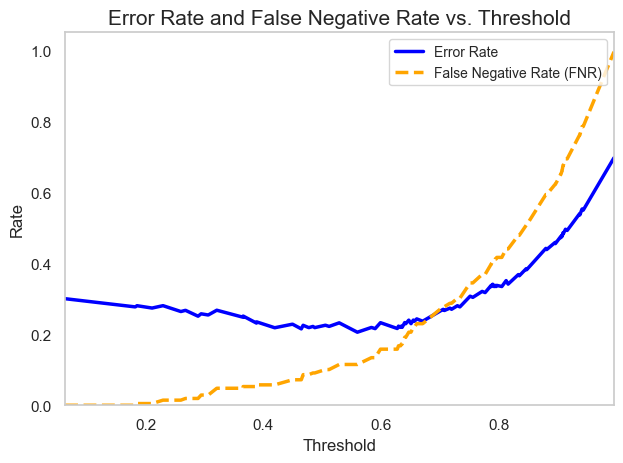

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, lr_preds_probs_2[:,1])

# Error rate is 1 - accuracy
# Accuracy = (TPR * P + (1 - FPR) * N) / Total
n_positives = credit_data['Class'].sum()  # Number of positives (P)
n_negatives = len(credit_data) - n_positives  # Number of negatives (N)
accuracy = (tpr * n_positives + (1 - fpr) * n_negatives) / len(credit_data)
error_rate = 1 - accuracy

# False Negative Rate (FNR) is 1 - TPR
fnr = 1 - tpr

# Sanity check: Remove any NaN or Inf values from both arrays
valid_indices = np.isfinite(error_rate) & np.isfinite(thresholds)

# Set Seaborn style
sns.set(style='whitegrid')

# Plot Error Rate
sns.lineplot(x=thresholds[valid_indices], y=error_rate[valid_indices], color='blue', label='Error Rate', linewidth=2.5)

# Plot False Negative Rate (FNR) in a dashed line
sns.lineplot(x=thresholds[valid_indices], y=fnr[valid_indices], color='orange', label='False Negative Rate (FNR)', linestyle='--', linewidth=2.5)

# Add labels and title with better formatting
plt.xlim([thresholds[valid_indices].min(), thresholds[valid_indices].max()])
plt.ylim([0.0, 1.05])
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Rate', fontsize=12)
plt.title('Error Rate and False Negative Rate vs. Threshold', fontsize=15)

# Add a legend
plt.legend(loc="upper right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.grid(False)
plt.show()

From the above plot, it is clearly visible that accuracy score (1-error rate) will be maximum at trheshold of around 0.5. However, we also need to consider the False Negative Rate (which is really important while working with credit risk data) to determine the optimal threshold. A lower threshold will result in a smaller False Negative Rate. However, this will come at the cost of Reduced Accuracy (as the above plot shows.)

In [48]:
from sklearn.metrics import accuracy_score

In [49]:
print(f"Accuracy score with a threshold of {threshold_1} is: {accuracy_score(y_pred=lr_pred_t1, y_true=y_test)}")
print(f"Accuracy score with a threshold of {threshold_2} is: {accuracy_score(y_pred=lr_pred_t2, y_true=y_test)}")
print(f"Accuracy score with a threshold of {threshold_3} is: {accuracy_score(y_pred=lr_pred_t3, y_true=y_test)}")

Accuracy score with a threshold of 0.2 is: 0.7233333333333334
Accuracy score with a threshold of 0.35 is: 0.7466666666666667
Accuracy score with a threshold of 0.5 is: 0.7733333333333333


### Part-c:-

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score

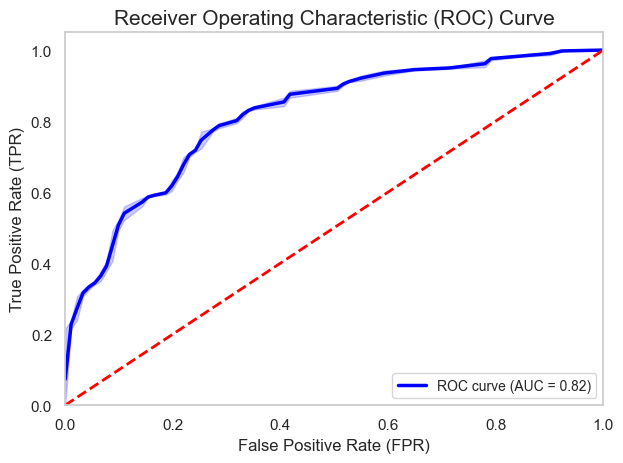

In [51]:
fpr, tpr, thresholds = roc_curve(y_test, lr_preds_probs_2[:,1])
auc = roc_auc_score(y_test, lr_preds_probs_2[:,1])

# Set Seaborn style
sns.set(style='whitegrid')

# Plot ROC curve
sns.lineplot(x=fpr, y=tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})', linewidth=2.5)

# Plot diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)

# Add labels and title with better formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])  # Slightly extend y-axis for aesthetics
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)

# Add a legend
plt.legend(loc="lower right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.grid(False)
plt.show()

In part (a), we achieved an AUC of 0.83, while in part (b), the AUC was slightly lower at 0.82. At first glance, it may seem that the model performed better in part (a). However, this difference is due to the fact that, in part (a), the same data was used for both training and testing. As a result, the model was evaluated on the same data it had already learned from, leading to an inflated performance.

In contrast, part (b) introduces the model to unseen data, where its performance dropped slightly. This reflects a more realistic measure of the model's ability to generalize to new data. Therefore, the results from part (b) are a more accurate representation of the model's true performance.

An out-of-sample AUC score (0.82) suggests that the model was able to capture the underlying trends and patterns of our data and has a decent predictive ability.

In [52]:
%reset -f

#   Question-2:-

In [53]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [54]:
credit_data = pd.read_csv("C:/Users/91629/Desktop/7th Sem/MBA786M/Project/Credit.csv")
print(credit_data.shape)

#   Binary Encoding the Class variable
credit_data['Class'] = credit_data['Class'].apply(lambda x: 0 if x == 'Bad' else 1)
print(f"No. of transactions classified as good (marked as 1): {np.sum(credit_data['Class'])}")     

(1000, 62)
No. of transactions classified as good (marked as 1): 700


In [55]:
#   Just re-arranging our columns
cols = [col for col in credit_data.columns if col != 'Class']
cols.append('Class')
credit_data = credit_data[cols]

In [56]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Part-a:-

#### Decision Tree Classifier:-

In [57]:
X = credit_data.drop("Class", axis=1)
y = credit_data["Class"]

In [58]:
#   We will not tweak our hyperparameters now and rely on the default hyperparameters
dt_model_1 = DecisionTreeClassifier()
dt_model_1.fit(X, y)

DecisionTreeClassifier()

In [59]:
dt_preds_1 = dt_model_1.predict(X)
dt_preds_probs_1 = dt_model_1.predict_proba(X)

credit_data['Predicted_Class_DT'] = dt_preds_1
credit_data['Predicted_Probs_DT'] = dt_preds_probs_1[:,1]

In [60]:
credit_data.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified,Class,Predicted_Class_DT,Predicted_Probs_DT
0,6,1169,4,4,67,2,1,0,1,1,...,0,1,0,0,0,1,0,1,1,1.0
1,48,5951,2,2,22,1,1,1,1,0,...,0,1,0,0,0,1,0,0,0,0.0
2,12,2096,2,3,49,1,2,1,1,0,...,0,1,0,0,1,0,0,1,1,1.0
3,42,7882,2,4,45,1,2,1,1,1,...,0,0,1,0,0,1,0,1,1,1.0
4,24,4870,3,4,53,2,2,1,1,1,...,0,0,1,0,0,1,0,0,0,0.0


We have achieved a 100% accuracy in our predictions!! Really suprising!! What this means is that our classifier has hard fit the data; possibly because we allowed our tree to grow infinitely until the last node. In general, this results in a very high variance.

In [61]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix
print(confusion_matrix(y_pred=credit_data['Predicted_Class_DT'], y_true=credit_data['Class']))

[[300   0]
 [  0 700]]


Visualising our decision tree:-
The above tree is quite a large tree as we have used Binary Recursive Splitting until the very end. A plot/ graphical representation of our fitted dcision tree is displayed here

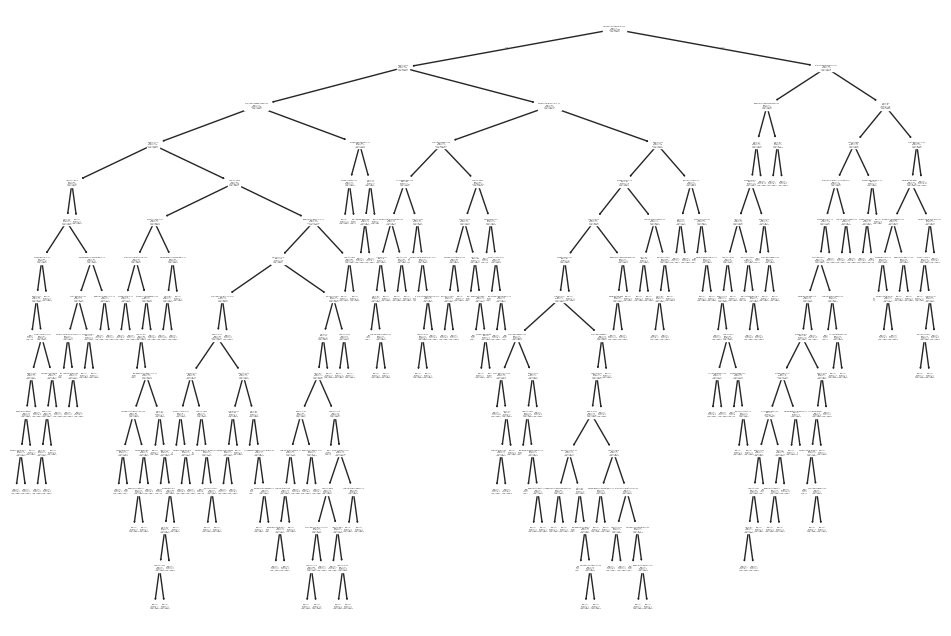

In [62]:
# Plot the decision tree
plt.figure(figsize=(12, 8))  # Set the figure size
plot_tree(
    dt_model_1, 
    feature_names=X.columns,  # Use feature names from the dataset
    class_names=['Class 0', 'Class 1'],  # Use class names, adjust as per your dataset
    # filled=True,  # Fill the nodes with colors to represent classes
    # rounded=True,  # Rounded edges for nodes
    # fontsize=10,  # Set font size for readability
)
plt.show()

##### Plotting the ROC-AUC curve:-

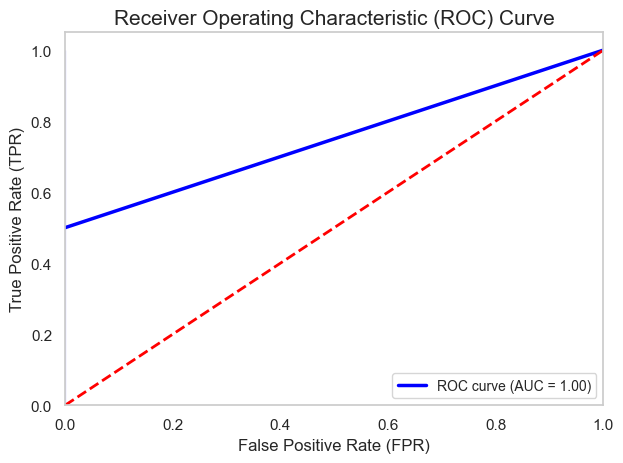

In [63]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(credit_data['Class'], credit_data['Predicted_Probs_DT'])
auc = roc_auc_score(credit_data['Class'], credit_data['Predicted_Probs_DT'])

# Set Seaborn style
sns.set(style='whitegrid')

# Plot ROC curve
sns.lineplot(x=fpr, y=tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})', linewidth=2.5)

# Plot diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)

# Add labels and title with better formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])  # Slightly extend y-axis for aesthetics
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)

# Add a legend
plt.legend(loc="lower right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.grid(False)
plt.show()

This is a clear cut example of overfitting. Thus, our model will not be able to provide good predictions for new unseen data. We can say this due to the following reasons:-
- The model was trained and tested on the same data. So, the data points used for testing or evaluating our model, was already seen previously by our model. This will lead to overestimation of the results.
- Decision tree model uses recursive binary splitting. So, here we grew our decision tree on our entire feature space, leading to a very large decision tree and thus, resulting in overfitting.


We will be handling both of these problems in Part-(b) of this question....

#### Bagging Classifier:-

In [64]:
bg_model_1 = BaggingClassifier()
bg_model_1.fit(X, y)

BaggingClassifier()

In [65]:
bg_preds_1 = bg_model_1.predict(X)
bg_preds_probs_1 = bg_model_1.predict_proba(X)

credit_data['Predicted_Class_BG'] = bg_preds_1
credit_data['Predicted_Probs_BG'] = bg_preds_probs_1[:,1]

In [66]:
print(confusion_matrix(y_pred=credit_data['Predicted_Class_BG'], y_true=credit_data['Class']))

[[296   4]
 [  6 694]]


##### Plotting the ROC-AUC curve:-

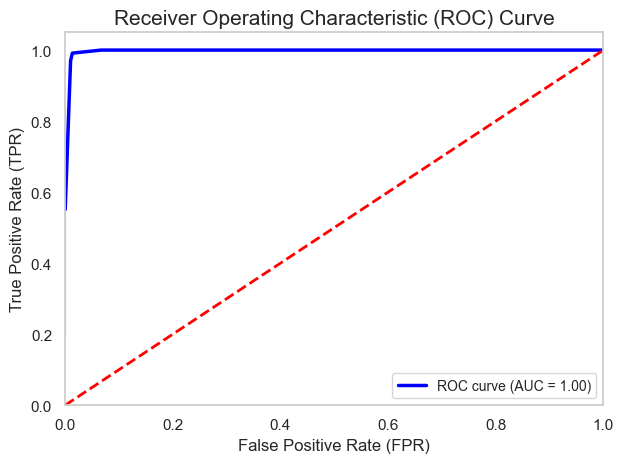

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(credit_data['Class'], credit_data['Predicted_Probs_BG'])
auc = roc_auc_score(credit_data['Class'], credit_data['Predicted_Probs_BG'])

# Set Seaborn style
sns.set(style='whitegrid')

# Plot ROC curve
sns.lineplot(x=fpr, y=tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})', linewidth=2.5)

# Plot diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)

# Add labels and title with better formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])  # Slightly extend y-axis for aesthetics
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)

# Add a legend
plt.legend(loc="lower right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.grid(False)
plt.show()

In Bagging classifier also, we are using the same data for training and evaluation. This will again lead to overfitting. However, as Bagging classifier is based on multiple decision trees and then aggregating their performance and predicting using a *majority-vote* rule; so this reduces overfitting to some extent.

We can say that the Bagging Classifier has lesser variance and overfitting than the Decision Tree Classifier. 

#### Random Forest Classifier:-

In [68]:
rf_model_1 = RandomForestClassifier()
rf_model_1.fit(X, y)

RandomForestClassifier()

In [69]:
rf_preds_1 = rf_model_1.predict(X)
rf_preds_probs_1 = rf_model_1.predict_proba(X)

credit_data['Predicted_Class_RF'] = rf_preds_1
credit_data['Predicted_Probs_RF'] = rf_preds_probs_1[:,1]

In [70]:
print(confusion_matrix(y_pred=credit_data['Predicted_Class_RF'], y_true=credit_data['Class']))

[[300   0]
 [  0 700]]


##### Plottting the ROC-AUC curve

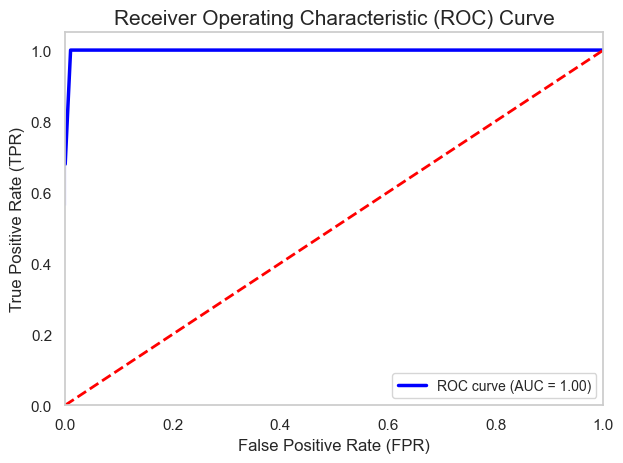

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(credit_data['Class'], credit_data['Predicted_Probs_RF'])
auc = roc_auc_score(credit_data['Class'], credit_data['Predicted_Probs_RF'])

# Set Seaborn style
sns.set(style='whitegrid')

# Plot ROC curve
sns.lineplot(x=fpr, y=tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})', linewidth=2.5)

# Plot diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)

# Add labels and title with better formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])  # Slightly extend y-axis for aesthetics
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)

# Add a legend
plt.legend(loc="lower right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.grid(False)
plt.show()

Again in Random Forest classifier also, we are using the same data for training and evaluation. This will again lead to overfitting. However, as Random Forest classifier is based on multiple decision trees, as well as using *Feature Sampling* to reduce the variance further;  and then aggregating their performance and predicting using a *majority-vote* rule; so this reduces overfitting to a great extent, resulting in higher predictive power. But still our Random Forest Classifier has overfitted to some extent, in our scenario. 

We can say that the Random Forest Classifier has the least variance, even lesser than Bagging and the Decision Tree Classifier. 

In [72]:
%reset -f

## Part-b:-

In [73]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [74]:
credit_data = pd.read_csv("C:/Users/91629/Desktop/7th Sem/MBA786M/Project/Credit.csv")
print(credit_data.shape)

#   Binary Encoding the Class variable
credit_data['Class'] = credit_data['Class'].apply(lambda x: 0 if x == 'Bad' else 1)
print(f"No. of transactions classified as good (marked as 1): {np.sum(credit_data['Class'])}")  

#   Just re-arranging our columns
cols = [col for col in credit_data.columns if col != 'Class']
cols.append('Class')
credit_data = credit_data[cols]

(1000, 62)
No. of transactions classified as good (marked as 1): 700


In [75]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(credit_data.drop("Class", axis=1), 
                                                    credit_data["Class"],
                                                    test_size=0.3,
                                                    random_state=42)

#### Decision Tree Classifier:-

In [77]:
dt_model_2 = DecisionTreeClassifier()
dt_model_2.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
dt_preds_2 = dt_model_2.predict(X_test)
dt_preds_probs_2 = dt_model_2.predict_proba(X_test)

# credit_data['Predicted_Class_DT'] = dt_preds_2
# credit_data['Predicted_Probs_DT'] = dt_preds_probs_2[:,1]

In [79]:
y_test.shape

(300,)

Visualisation of our Decision Tree:-

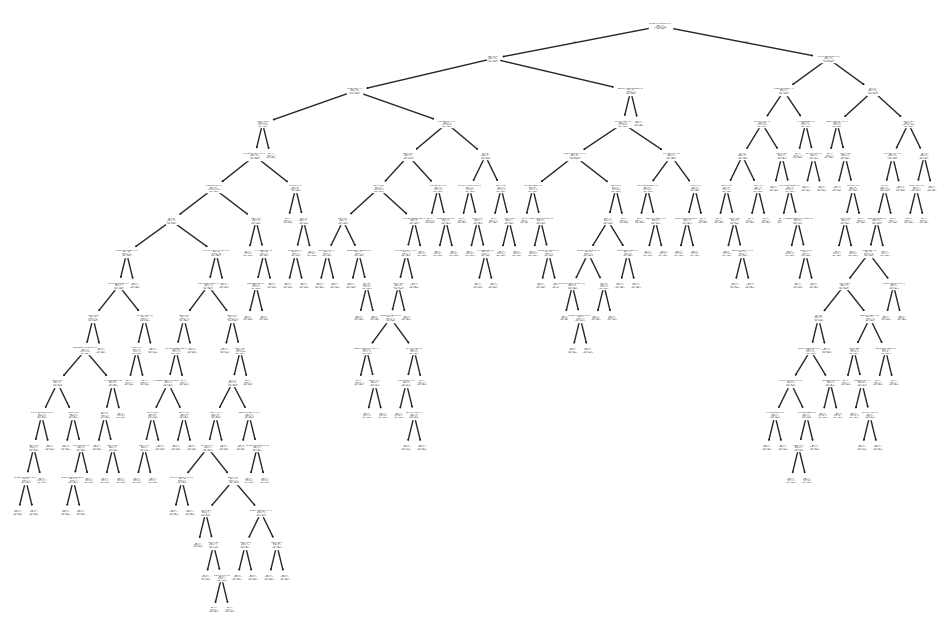

In [80]:
# Plot the decision tree
plt.figure(figsize=(12, 8))  # Set the figure size
plot_tree(
    dt_model_2, 
    feature_names=X_train.columns,  # Use feature names from the dataset
    class_names=['Class 0', 'Class 1'],  # Use class names, adjust as per your dataset
    # filled=True,  # Fill the nodes with colors to represent classes
    # rounded=True,  # Rounded edges for nodes
    # fontsize=10,  # Set font size for readability
)
plt.show()

Again the tree fitted is quite large. And so, there is a scope of improvement here: We could tune our hyperparameters and set some constraints on the max size of the tree and so on. We use GridSearchCV to perform the same. We test max_depth for some values and choose the optimal one based on the performance of our model. 

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix

cf1 = confusion_matrix(y_pred=dt_preds_2, y_true=y_test)
acc_DT = accuracy_score(y_true=y_test, y_pred=dt_preds_2)
FNR_DT = cf1[1,0]
print(cf1)

[[ 44  47]
 [ 54 155]]


To reduce overfitting, one possible thing that we could perform is to tune the hyperparameters of our decision tree classifier. For eg: setting a value for the hyerparameters like *max_depth*, *max_features*, *min_samples_leaf*, *min_samples_split* etc. Out of which, for now let us tune *max_depth* with the help of GridSearchCV for the best results

#### Performing Grid Search CV and Hyperparameter tuning:-

In [82]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for max_depth and max_features
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 10, 20]  # Trying various depths
}

# Initialize the Decision Tree Classifier
dt_model_CV = DecisionTreeClassifier()

# Set up GridSearchCV with cross-validation (cv=5)
grid_search = GridSearchCV(estimator=dt_model_CV, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on the data
grid_search.fit(X_train, y_train)

# Display the best parameters and the corresponding score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.4f}")

Best Parameters: {'max_depth': 3}
Best Cross-validation Accuracy: 0.7171


In [83]:
#   So, using our GridSearchCV results, we get:-
dt_ultimate_model = DecisionTreeClassifier(max_depth=3)
dt_ultimate_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Plotting the optimised Decision Tree

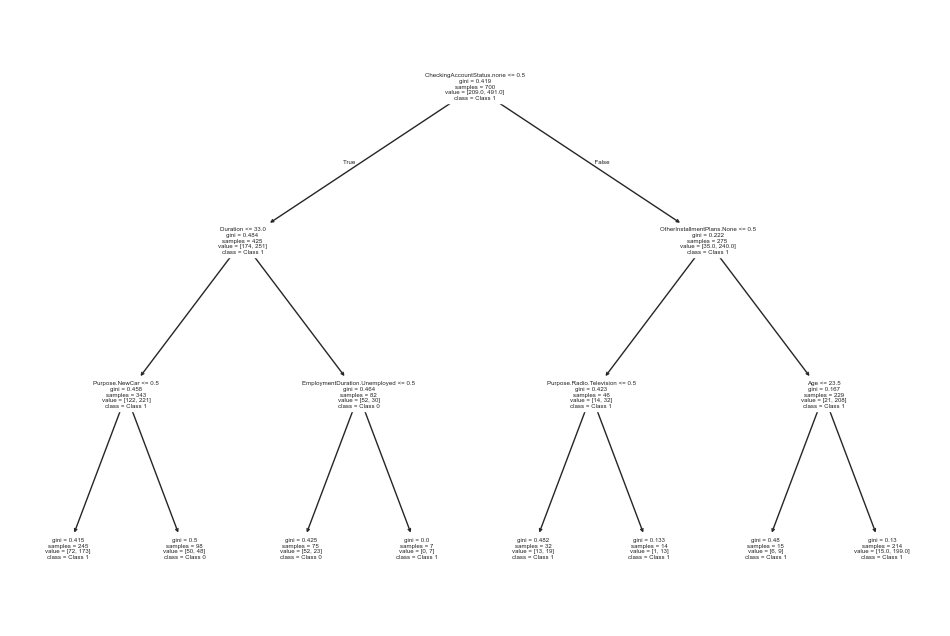

In [84]:
# Plot the decision tree
plt.figure(figsize=(12, 8))  # Set the figure size
plot_tree(
    dt_ultimate_model, 
    feature_names=X_train.columns,  # Use feature names from the dataset
    class_names=['Class 0', 'Class 1'],  # Use class names, adjust as per your dataset
    # filled=True,  # Fill the nodes with colors to represent classes
    # rounded=True,  # Rounded edges for nodes
    # fontsize=10,  # Set font size for readability
)
plt.show()

In [85]:
cf_ultimate = confusion_matrix(y_pred=dt_ultimate_model.predict(X_test), y_true=y_test)
acc_ultimate = accuracy_score(y_true=y_test, y_pred=dt_ultimate_model.predict(X_test))
FNR_ultimate = cf_ultimate[1,0]
print(cf1)

[[ 44  47]
 [ 54 155]]


We achieved exactly the same performance on test set, but now with a tree of comaparatively quite smaller in size!! 

##### Plotting the ROC-AUC curve:-

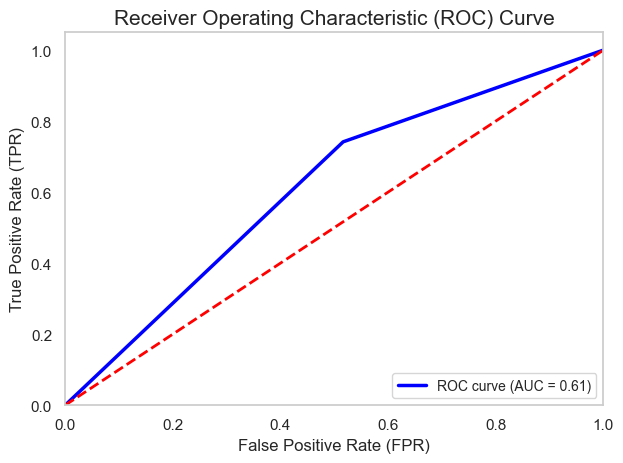

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=dt_preds_probs_2[:,1])
auc = roc_auc_score(y_true=y_test, y_score=dt_preds_probs_2[:,1])

# Set Seaborn style
sns.set(style='whitegrid')

# Plot ROC curve
sns.lineplot(x=fpr, y=tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})', linewidth=2.5)

# Plot diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)

# Add labels and title with better formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])  # Slightly extend y-axis for aesthetics
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)

# Add a legend
plt.legend(loc="lower right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.grid(False)
plt.show()

#### Bagging Classifier:- (Need to perform Hyperparameter tuning using Cross-validation)

In [87]:
bg_model_2 = BaggingClassifier()
bg_model_2.fit(X_train, y_train)

BaggingClassifier()

In [88]:
bg_preds_2 = bg_model_2.predict(X_test)
bg_preds_probs_2 = bg_model_2.predict_proba(X_test)

# credit_data['Predicted_Class_BG'] = bg_preds_2
# credit_data['Predicted_Probs_BG'] = bg_preds_probs_2[:,1]

In [89]:
cf2 = confusion_matrix(y_pred=bg_preds_2, y_true=y_test)
acc_BG = accuracy_score(y_pred=bg_preds_2, y_true=y_test)
FNR_BG = cf2[1,0]
print(cf2)

[[ 49  42]
 [ 43 166]]


##### Plotting the ROC-AUC score:-

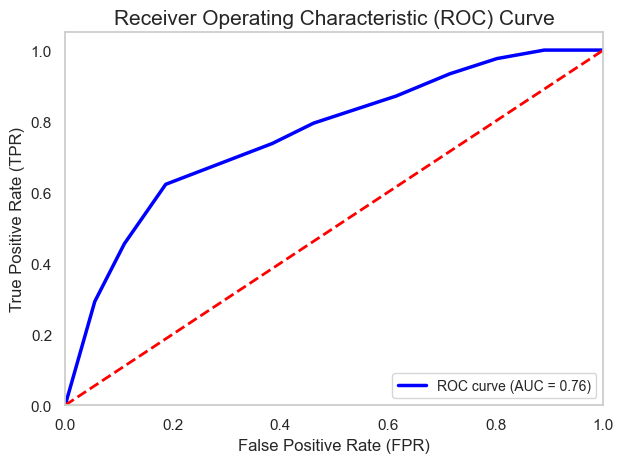

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, bg_preds_probs_2[:,1])
auc = roc_auc_score(y_test, bg_preds_probs_2[:,1])

# Set Seaborn style
sns.set(style='whitegrid')

# Plot ROC curve
sns.lineplot(x=fpr, y=tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})', linewidth=2.5)

# Plot diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)

# Add labels and title with better formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])  # Slightly extend y-axis for aesthetics
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)

# Add a legend
plt.legend(loc="lower right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.grid(False)
plt.show()

#### Performing Hyperparameter tuning for the Bagging Model:-

In [91]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the Bagging model (without specifying a base estimator)
param_grid = {
    'n_estimators': [100, 150, 200],                        # Tuning the number of trees in the Bagging ensemble
    'max_features': [0.5, 0.7, 1.0]                      # Tuning the max features for Bagging
    # 'max_samples': [0.5, 0.7, 1.0],                       # Tuning the max samples for Bagging
    # 'bootstrap': [True, False]                            # Tuning whether to use bootstrap sampling
}

# Initialize the Bagging Classifier without a base estimator (default is a DecisionTreeClassifier)
bagging_ultimate_model = BaggingClassifier()

# Set up GridSearchCV with cross-validation (cv=5)
grid_search = GridSearchCV(estimator=bagging_ultimate_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on the data
grid_search.fit(X_train, y_train)

# Display the best parameters and the corresponding score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.4f}")

Best Parameters: {'max_features': 0.7, 'n_estimators': 100}
Best Cross-validation Accuracy: 0.7671


##### Fitting a Bagging with the optimised Hyperparameters:-

In [92]:
bg_model_ultimate = BaggingClassifier(max_features=0.5, n_estimators=100)
bg_model_ultimate.fit(X_train, y_train)

BaggingClassifier(max_features=0.5, n_estimators=100)

In [93]:
bg_preds_ultimate = bg_model_ultimate.predict(X_test)
bg_preds_probs_ultimate = bg_model_ultimate.predict_proba(X_test)

In [94]:
cf_ultimate = confusion_matrix(y_pred=bg_preds_ultimate, y_true=y_test)
acc_BG_ultimate = accuracy_score(y_pred=bg_preds_ultimate, y_true=y_test)
FNR_BG_ultimate = cf_ultimate[1,0]
print(cf_ultimate)

[[ 28  63]
 [ 14 195]]


We see a slight improvement in accuracy in the hyperparameter tuned Bagging Tree Classifer. It is evident that hyperparameter tuning helps a lot in mitigating the bia-variance tradeoff and thus improving the performance of our model

#### Random Forest Classifier:-

In [95]:
rf_model_2 = RandomForestClassifier()
rf_model_2.fit(X_train, y_train)

RandomForestClassifier()

In [96]:
rf_preds_2 = rf_model_2.predict(X_test)
rf_preds_probs_2 = rf_model_2.predict_proba(X_test)

# credit_data['Predicted_Class_RF'] = rf_preds_2
# credit_data['Predicted_Probs_RF'] = rf_preds_probs_2[:,1]

In [97]:
cf3 = confusion_matrix(y_pred=rf_preds_2, y_true=y_test)
acc_RF = accuracy_score(y_pred=rf_preds_2, y_true=y_test)
FNR_RF = cf3[1,0]
print(cf3)

[[ 35  56]
 [ 13 196]]


##### Plotting the ROC-AUC curve:-

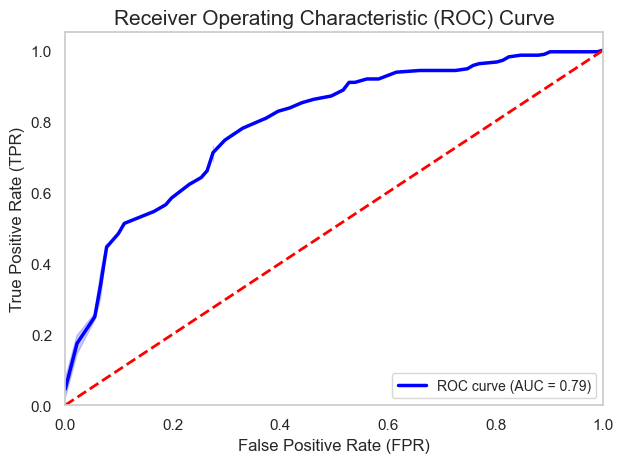

In [98]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, rf_preds_probs_2[:,1])
auc = roc_auc_score(y_test, rf_preds_probs_2[:,1])

# Set Seaborn style
sns.set(style='whitegrid')

# Plot ROC curve
sns.lineplot(x=fpr, y=tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})', linewidth=2.5)

# Plot diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)

# Add labels and title with better formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])  # Slightly extend y-axis for aesthetics
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)

# Add a legend
plt.legend(loc="lower right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.grid(False)
plt.show()

#### Performing Hyperparameter tuning for the Random Forest Model:-

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the RandomForest model
param_grid = {
    'n_estimators': [100, 150, 200],                        # Tuning the number of trees in the forest
    'max_features': [0.5, 0.7, 1.0]                      # Tuning the max features for Random Forest
#     'max_depth': [3, 5, 7, 10],                           # Tuning the depth of each tree
#     'bootstrap': [True, False]                            # Whether to bootstrap samples when building trees
}

# Initialize the Random Forest Classifier
rf_model_ultimate = RandomForestClassifier()

# Set up GridSearchCV with cross-validation (cv=5)
grid_search = GridSearchCV(estimator=rf_model_ultimate, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model on the data
grid_search.fit(X_train, y_train)

# Display the best parameters and the corresponding score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.4f}")

Best Parameters: {'max_features': 0.5, 'n_estimators': 100}
Best Cross-validation Accuracy: 0.7414


#### Fitting the hyperparameter tuned optimised model:-

In [100]:
rf_model_ultimate = RandomForestClassifier(max_features=0.5, n_estimators=150)
rf_model_ultimate.fit(X_train, y_train)

RandomForestClassifier(max_features=0.5, n_estimators=150)

In [101]:
rf_preds_ultimate = rf_model_ultimate.predict(X_test)
rf_preds_probs_ultimate = rf_model_ultimate.predict_proba(X_test)

In [102]:
cf_ultimate_rf = confusion_matrix(y_pred=rf_preds_ultimate, y_true=y_test)
acc_RF_ultimate = accuracy_score(y_pred=rf_preds_ultimate, y_true=y_test)
FNR_RF_ultimate = cf_ultimate_rf[1,0]
print(cf_ultimate_rf)

[[ 36  55]
 [ 20 189]]


Again, we see a slight improvement in the performance(accuracy) of our model after optimisation using hyperparamter tuning. It helped to mitigate the bias variance tradeoff in this situation as well!!

What model will you choose and why?

In [103]:
print(f"Accuracy of Decision Tree is: {acc_DT} and False Negative Rate is: {round(FNR_DT / 300, 3)}")
print(f"Accuracy of Bagging Classifier is: {acc_BG} and False Negative Rate is: {round(FNR_BG/300, 3)}")
print(f"Accuracy of Random Forest Classifier is: {acc_RF} and False Negative Rate is: {round(FNR_RF/300, 3)}")

Accuracy of Decision Tree is: 0.6633333333333333 and False Negative Rate is: 0.18
Accuracy of Bagging Classifier is: 0.7166666666666667 and False Negative Rate is: 0.143
Accuracy of Random Forest Classifier is: 0.77 and False Negative Rate is: 0.043


Comparing the False Negative Rates and Accuracy of the three models, we can easily conclude that RF is the best classifier out of the three, for a credit risk perspective as it has the highest accuracy as well as the lowest False Negative Rate out of the three classifiers.

#### Additional Topic:-

**`SPECIAL NOTE`**: Decision Tree, Bagging and Random Forest models don't output probability in general. They directly output the class labels (0 - Bad, 1 - Good). However, we can still output probabilites of the classes from these models. And then, we can set a threshold and from that, predict the class labels. The following plots are a representation of this itself.

Plot of Error Rate and False Negative Rate for Decision Tree

Obviously, the error rate will show a straight line

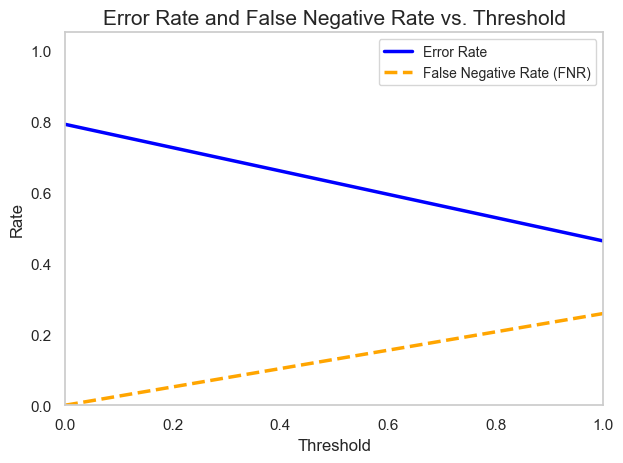

In [104]:
fpr, tpr, thresholds = roc_curve(y_test, dt_preds_probs_2[:,1])

# Error rate is 1 - accuracy
# Accuracy = (TPR * P + (1 - FPR) * N) / Total
n_positives = y_test.sum()  # Number of positives (P)
n_negatives = len(credit_data) - n_positives  # Number of negatives (N)
accuracy = (tpr * n_positives + (1 - fpr) * n_negatives) / len(credit_data)
error_rate = 1 - accuracy

# False Negative Rate (FNR) is 1 - TPR
fnr = 1 - tpr

# Sanity check: Remove any NaN or Inf values from both arrays
valid_indices = np.isfinite(error_rate) & np.isfinite(thresholds)

# Set Seaborn style
sns.set(style='whitegrid')

# Plot Error Rate
sns.lineplot(x=thresholds[valid_indices], y=error_rate[valid_indices], color='blue', label='Error Rate', linewidth=2.5)

# Plot False Negative Rate (FNR) in a dashed line
sns.lineplot(x=thresholds[valid_indices], y=fnr[valid_indices], color='orange', label='False Negative Rate (FNR)', linestyle='--', linewidth=2.5)

# Add labels and title with better formatting
plt.xlim([thresholds[valid_indices].min(), thresholds[valid_indices].max()])
plt.ylim([0.0, 1.05])
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Rate', fontsize=12)
plt.title('Error Rate and False Negative Rate vs. Threshold', fontsize=15)

# Add a legend
plt.legend(loc="upper right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.grid(False)
plt.show()

Plot of Error Rate and False Negative Rate for the Bagging Classifier

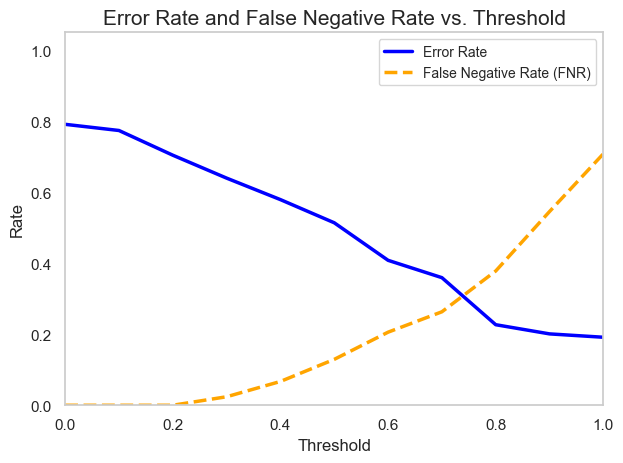

In [105]:
fpr, tpr, thresholds = roc_curve(y_test, bg_preds_probs_2[:,1])

# Error rate is 1 - accuracy
# Accuracy = (TPR * P + (1 - FPR) * N) / Total
n_positives = y_test.sum()  # Number of positives (P)
n_negatives = len(credit_data) - n_positives  # Number of negatives (N)
accuracy = (tpr * n_positives + (1 - fpr) * n_negatives) / len(credit_data)
error_rate = 1 - accuracy

# False Negative Rate (FNR) is 1 - TPR
fnr = 1 - tpr

# Sanity check: Remove any NaN or Inf values from both arrays
valid_indices = np.isfinite(error_rate) & np.isfinite(thresholds)

# Set Seaborn style
sns.set(style='whitegrid')

# Plot Error Rate
sns.lineplot(x=thresholds[valid_indices], y=error_rate[valid_indices], color='blue', label='Error Rate', linewidth=2.5)

# Plot False Negative Rate (FNR) in a dashed line
sns.lineplot(x=thresholds[valid_indices], y=fnr[valid_indices], color='orange', label='False Negative Rate (FNR)', linestyle='--', linewidth=2.5)

# Add labels and title with better formatting
plt.xlim([thresholds[valid_indices].min(), thresholds[valid_indices].max()])
plt.ylim([0.0, 1.05])
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Rate', fontsize=12)
plt.title('Error Rate and False Negative Rate vs. Threshold', fontsize=15)

# Add a legend
plt.legend(loc="upper right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.grid(False)
plt.show()

Plot of Error Rate and False Negative Rate for Random Forest Classifier

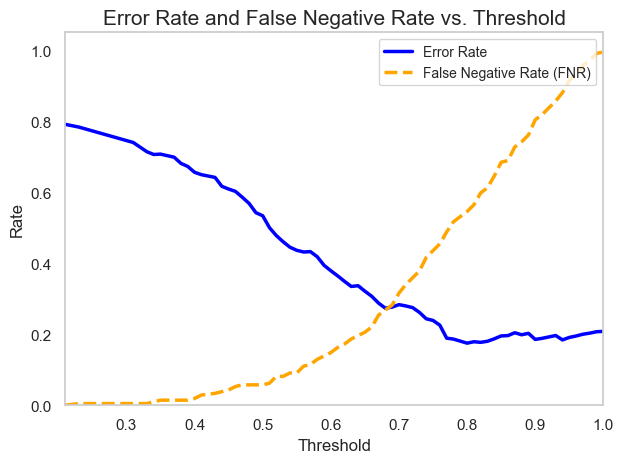

In [106]:
fpr, tpr, thresholds = roc_curve(y_test, rf_preds_probs_2[:,1])

# Error rate is 1 - accuracy
# Accuracy = (TPR * P + (1 - FPR) * N) / Total
n_positives = y_test.sum()  # Number of positives (P)
n_negatives = len(credit_data) - n_positives  # Number of negatives (N)
accuracy = (tpr * n_positives + (1 - fpr) * n_negatives) / len(credit_data)
error_rate = 1 - accuracy

# False Negative Rate (FNR) is 1 - TPR
fnr = 1 - tpr

# Sanity check: Remove any NaN or Inf values from both arrays
valid_indices = np.isfinite(error_rate) & np.isfinite(thresholds)

# Set Seaborn style
sns.set(style='whitegrid')

# Plot Error Rate
sns.lineplot(x=thresholds[valid_indices], y=error_rate[valid_indices], color='blue', label='Error Rate', linewidth=2.5)

# Plot False Negative Rate (FNR) in a dashed line
sns.lineplot(x=thresholds[valid_indices], y=fnr[valid_indices], color='orange', label='False Negative Rate (FNR)', linestyle='--', linewidth=2.5)

# Add labels and title with better formatting
plt.xlim([thresholds[valid_indices].min(), thresholds[valid_indices].max()])
plt.ylim([0.0, 1.05])
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Rate', fontsize=12)
plt.title('Error Rate and False Negative Rate vs. Threshold', fontsize=15)

# Add a legend
plt.legend(loc="upper right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.grid(False)
plt.show()

To evaluate the three models of Question 2, we should consider these two factors:-
- lower the error rate, better the model
- lower the False negative rate, better the model

So, comparing the three models on the above basis, we find that random forest classifier has the highest accuracy (lowest error rate) and lowest False Negative Rate among the three. Clearly, Random Forest Classifier is the clear winner out of these three  

#### Part-c:-

In [107]:
feature_importances = rf_model_2.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print("\nFeature Importances (sorted in descending order):")
print(importance_df)


Feature Importances (sorted in descending order):
                       Feature  Importance
1                       Amount    0.099936
4                          Age    0.082227
0                     Duration    0.075625
12  CheckingAccountStatus.none    0.053318
2    InstallmentRatePercentage    0.035667
..                         ...         ...
57     Job.UnemployedUnskilled    0.002529
22   Purpose.DomesticAppliance    0.002434
26          Purpose.Retraining    0.000968
43      Personal.Female.Single    0.000000
25            Purpose.Vacation    0.000000

[61 rows x 2 columns]


Visulaisation of most important fetaures for the best model (Random Forest)

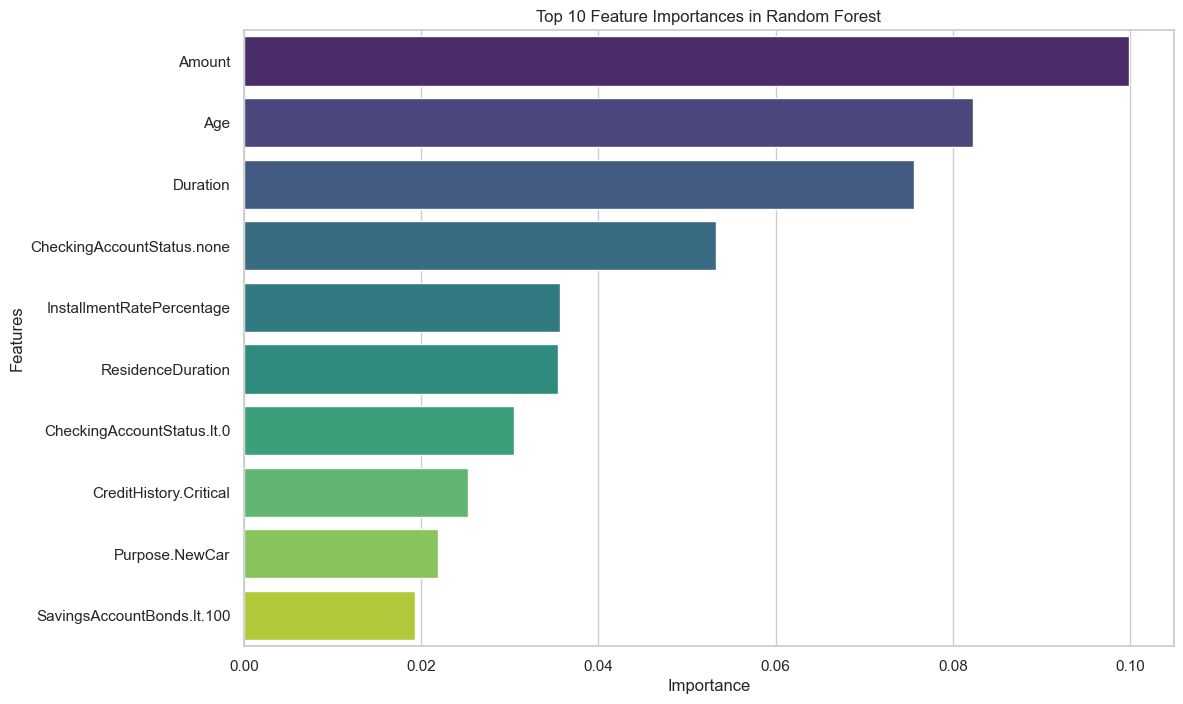

In [108]:
import warnings
warnings.filterwarnings('ignore')

k = 10      #   For more tune this hyperaparameter

plt.figure(figsize=(12, 8))
top_k_features = importance_df.head(k)
sns.barplot(x="Importance", y="Feature", data=top_k_features, palette="viridis")
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title(f'Top {k} Feature Importances in Random Forest')
plt.show()

#### Part-d:-

Comparing the best Logistic Regression model (0.72, 0.003)  and the Random Forest model (0.75, 0.06), we came to conclude that Random Forest is the best model in terms of accuracy. However, if we consider False Negative Rates(FNR) into account (which is a very important metric for credit risk modelling), then Logistic Regression is the clear winner. 

In [109]:
%reset -f

# Question-3:-

In [110]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [111]:
credit_data = pd.read_csv("C:/Users/91629/Desktop/7th Sem/MBA786M/Project/Credit.csv")
print(credit_data.shape)

#   Binary Encoding the Class variable
credit_data['Class'] = credit_data['Class'].apply(lambda x: 0 if x == 'Bad' else 1)
print(f"No. of transactions classified as good (marked as 1): {np.sum(credit_data['Class'])}")     


#   Just re-arranging our columns
cols = [col for col in credit_data.columns if col != 'Class']
cols.append('Class')
credit_data = credit_data[cols]

(1000, 62)
No. of transactions classified as good (marked as 1): 700


Before fitting a KNN model, we must:-
- Standardise the Numerical/Continuous variables
- One-hot encode the Categorical variables (Already one-hot encoded in the data itself)

This is done especially as KNN uses the principle of Euclidean distance for classification. So, numerical variables must be standardised. And for the categorical variables, as only binary variables are prsent to us, we don't need one-hot encoding in our case.

However this can be done in two ways:-
1. Standardise whole data first and then split into train and test
2. Split into train and test first and then standardise the train dataset only first. Now, with the parameters learnt from the train dataset, standardise the test dataset.

Method 2 is recommended and is the suggested method to perform standardisation. This is because, method 1 might lead to overestimation of our results. Here, we followed Method 2 to standardise our *Numerica* variables only.

In [112]:
#   These are the 'numerical/continuous' variables as per the Data Description mentioned in the Data Description:-
numerical_variables = ['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration', 'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance']
for col in credit_data.columns:
    if col in numerical_variables:
        print(col)
        print(np.unique(credit_data[col]))
        print()
        print('-'*100)

Duration
[ 4  5  6  7  8  9 10 11 12 13 14 15 16 18 20 21 22 24 26 27 28 30 33 36
 39 40 42 45 47 48 54 60 72]

----------------------------------------------------------------------------------------------------
Amount
[  250   276   338   339   343   362   368   385   392   409   426   428
   433   448   454   458   484   518   522   571   585   590   601   609
   618   625   626   629   639   640   652   654   660   662   666   672
   674   682   683   684   685   691   697   700   701   707   708   709
   717   719   727   730   731   741   745   750   753   754   759   760
   763   766   776   781   783   790   795   797   802   804   806   836
   841   846   860   866   874   882   884   886   888   894   900   902
   907   909   915   918   926   929   930   931   932   936   937   939
   947   950   951   958   959   960   975   976   983   996   999  1007
  1024  1028  1037  1038  1042  1047  1048  1049  1050  1053  1055  1056
  1068  1076  1082  1092  1098  1101  1103  1107  

Step-I: Split into train and test first

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(credit_data.drop('Class', axis=1),
                                                    credit_data['Class'],
                                                    test_size=0.3,
                                                    random_state=42)

Step-II: Perform standardisation of numerical variables only, as mentioned above

In [114]:
from sklearn.preprocessing import StandardScaler

In [115]:
#   Now we need to standardise the Numerical variables. Let's standardise the mentioned columns inplace.
#   However, we don't perform any operation on our Categorical variables as they are already in the correct form

scaler = StandardScaler()
X_train[numerical_variables] = scaler.fit_transform(X_train[numerical_variables])

In [116]:
#   Perform standardisation with the transformations learnt from X_train
X_test[numerical_variables] = scaler.transform(X_test[numerical_variables])

### Part-a:-

In [117]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

####   KNN with K = 1

In [118]:
knn_1 = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
pred_knn_1 = knn_1.predict(X_test)
pred_probs_knn_1 = knn_1.predict_proba(X_test)

In [119]:
cm_1 = confusion_matrix(y_true=y_test, y_pred=pred_knn_1)
FN_1 = cm_1[1,0]
acc_1 = accuracy_score(y_true=y_test, y_pred=pred_knn_1)
print(cm_1)

[[ 41  50]
 [ 38 171]]


##### Plot the ROC-AUC curve

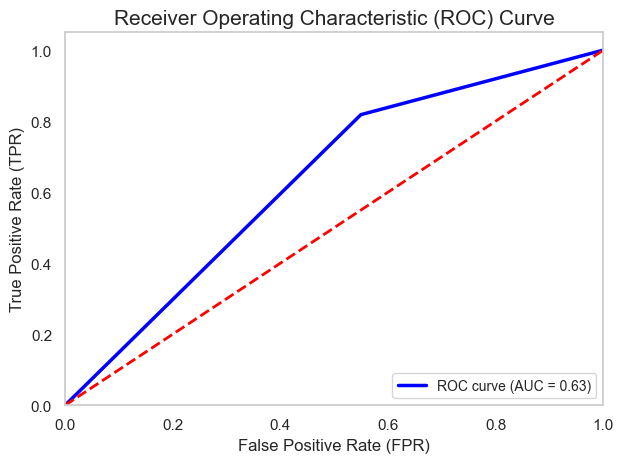

In [120]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, pred_probs_knn_1[:,1])
auc = roc_auc_score(y_test, pred_probs_knn_1[:,1])

# Set Seaborn style
sns.set(style='whitegrid')

# Plot ROC curve
sns.lineplot(x=fpr, y=tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})', linewidth=2.5)

# Plot diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)

# Add labels and title with better formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])  # Slightly extend y-axis for aesthetics
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)

# Add a legend
plt.legend(loc="lower right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.grid(False)
plt.show()

The ROC-AUC curve is like this because we are using K = 1. So, it is practically not possible to calculate the probability. Thus, the value of probability will either be 0 or 1.

#### KNN with K = 3

In [121]:
knn_2 = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
pred_knn_2 = knn_2.predict(X_test)
pred_probs_knn_2 = knn_2.predict_proba(X_test)

In [122]:
cm_2 = confusion_matrix(y_true=y_test, y_pred=pred_knn_2)
FN_2 = cm_2[1,0]
acc_2 = accuracy_score(y_true=y_test, y_pred=pred_knn_2)
print(cm_2)

[[ 34  57]
 [ 21 188]]


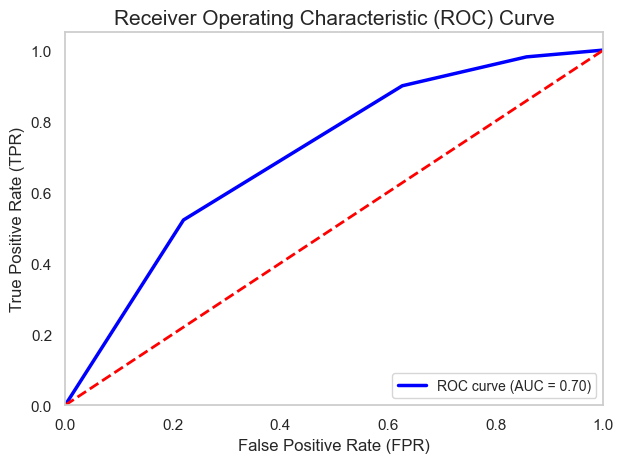

In [123]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, pred_probs_knn_2[:,1])
auc = roc_auc_score(y_test, pred_probs_knn_2[:,1])

# Set Seaborn style
sns.set(style='whitegrid')

# Plot ROC curve
sns.lineplot(x=fpr, y=tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})', linewidth=2.5)

# Plot diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)

# Add labels and title with better formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])  # Slightly extend y-axis for aesthetics
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)

# Add a legend
plt.legend(loc="lower right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.grid(False)
plt.show()

#### KNN with K = 5

In [124]:
knn_3 = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
pred_knn_3 = knn_3.predict(X_test)
pred_probs_knn_3 = knn_3.predict_proba(X_test)

In [125]:
cm_3 = confusion_matrix(y_true=y_test, y_pred=pred_knn_3)
FN_3 = cm_3[1,0]
acc_3 = accuracy_score(y_true=y_test, y_pred=pred_knn_3)
print(cm_3)

[[ 32  59]
 [ 20 189]]


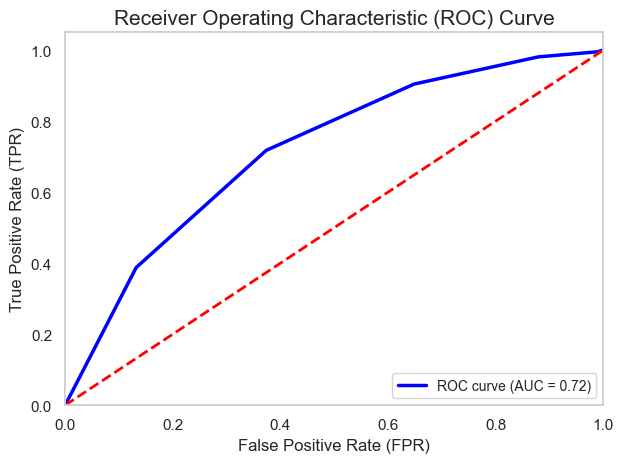

In [126]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, pred_probs_knn_3[:,1])
auc = roc_auc_score(y_test, pred_probs_knn_3[:,1])

# Set Seaborn style
sns.set(style='whitegrid')

# Plot ROC curve
sns.lineplot(x=fpr, y=tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})', linewidth=2.5)

# Plot diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)

# Add labels and title with better formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])  # Slightly extend y-axis for aesthetics
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)

# Add a legend
plt.legend(loc="lower right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.grid(False)
plt.show()

#### KNN with K = 10

In [127]:
knn_4 = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)
pred_knn_4 = knn_4.predict(X_test)
pred_probs_knn_4 = knn_4.predict_proba(X_test)

In [128]:
cm_4 = confusion_matrix(y_true=y_test, y_pred=pred_knn_4)
FN_4 = cm_4[1,0]
acc_4 = accuracy_score(y_true=y_test, y_pred=pred_knn_4)
print(cm_4)

[[ 30  61]
 [ 22 187]]


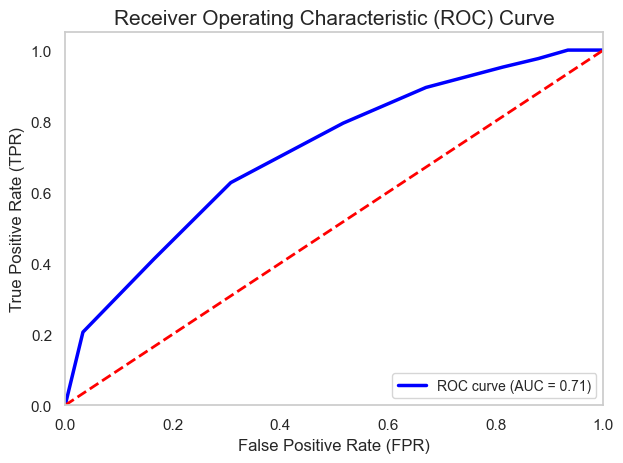

In [129]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, pred_probs_knn_4[:,1])
auc = roc_auc_score(y_test, pred_probs_knn_4[:,1])

# Set Seaborn style
sns.set(style='whitegrid')

# Plot ROC curve
sns.lineplot(x=fpr, y=tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})', linewidth=2.5)

# Plot diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)

# Add labels and title with better formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])  # Slightly extend y-axis for aesthetics
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)

# Add a legend
plt.legend(loc="lower right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.grid(False)
plt.show()

In [130]:
print(f"KNN with K=1 has an accuracy score of: {round(acc_1,3)} and a False Negative Rate of: {round(FN_1/300, 3)}")
print(f"KNN with K=3 has an accuracy score of: {round(acc_2,3)} and a False Negative Rate of: {round(FN_2/300, 3)}")
print(f"KNN with K=5 has an accuracy score of: {round(acc_3,3)} and a False Negative Rate of: {round(FN_3/300, 3)}")
print(f"KNN with K=10 has an accuracy score of: {round(acc_4,3)} and a False Negative Rate of: {round(FN_4/300, 3)}")

KNN with K=1 has an accuracy score of: 0.707 and a False Negative Rate of: 0.127
KNN with K=3 has an accuracy score of: 0.74 and a False Negative Rate of: 0.07
KNN with K=5 has an accuracy score of: 0.737 and a False Negative Rate of: 0.067
KNN with K=10 has an accuracy score of: 0.723 and a False Negative Rate of: 0.073


So, out of the 4 different variants of KNN with K =1, 3, 5 and 10, it is clearly visible that the KNN with K=5 has the highest accuracy of 0.733 among the KNN models as well as the lowest False Negative Score of 0.067 at the same time. So, in this setting, undoubtedly, KNN with K=5 is the best model among the 4 KNN models.

### Part-b:-

Accuracy of Decision Tree is: 0.666 and False Negative Rate is: 0.187  
Accuracy of Bagging Classifier is: 0.716 and False Negative Rate is: 0.130  
Accuracy of Random Forest Classifier is: 0.776 and False Negative Rate is: 0.043


Accuracy of Logistic Regression at a threshold of 0.2 is: 0.723 and False Negative Rate is: 0.0033  
Accuracy of Logistic Regression at a threshold of 0.35 is: 0.746 and False Negative Rate is: 0.033  
Accuracy of Logistic Regression at a threshold of 0.5 is: 0.773 and False Negative Rate is: 0.07


So, based on the above numbers and metrics, it is clearly visible to us that Random Forest Classifier is, by far, the best model with the highest accuracy. But from a False Negative Rate perspective, which is important as well from an alert model perspective, Logistic Regression with a threshold of 0.2 is the best model.

In [131]:
%reset -f

# Question-4:-

### Part-a:-  
We will be fitting a SVM Classifier with a Radial Basis Function (RBF) as the Kernel for this question.

In [132]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [133]:
credit_data = pd.read_csv("C:/Users/91629/Desktop/7th Sem/MBA786M/Project/Credit.csv")
print(credit_data.shape)

#   Binary Encoding the Class variable
credit_data['Class'] = credit_data['Class'].apply(lambda x: 0 if x == 'Bad' else 1)
print(f"No. of transactions classified as good (marked as 1): {np.sum(credit_data['Class'])}")     


#   Just re-arranging our columns
cols = [col for col in credit_data.columns if col != 'Class']
cols.append('Class')
credit_data = credit_data[cols]

(1000, 62)
No. of transactions classified as good (marked as 1): 700


We must standardise our numerical variables before fitting SVM for better results. Again, we follow the technique of standardisation which was mentioned previously. That is, first split the data into train and test, then standardise our train data only. Then using the parameters learnt, we stndardise our test data.

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(credit_data.drop("Class", axis=1),
                                                    credit_data['Class'],
                                                    test_size=0.3,
                                                    random_state=42)

In [135]:
numerical_variables = ['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration', 'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance']

from sklearn.preprocessing import StandardScaler
scaler_2 = StandardScaler()
X_train[numerical_variables] = scaler_2.fit_transform(X_train[numerical_variables])

In [136]:
X_test[numerical_variables] = scaler_2.transform(X_test[numerical_variables])

In [137]:
X_train.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
541,0.231016,-0.462936,0.911164,1.057385,2.179382,0.997799,-0.398673,0,1,0,...,0,0,1,0,0,1,0,0,1,0
440,-0.778104,-0.512772,0.911164,1.057385,0.311885,-0.722544,-0.398673,0,1,0,...,0,0,1,0,1,0,0,0,0,1
482,0.735576,0.072458,0.911164,1.057385,1.912597,0.997799,-0.398673,0,1,1,...,0,0,1,1,0,0,0,0,1,0
422,-0.778104,-0.824580,-0.877938,0.150315,1.023312,0.997799,2.508319,1,1,0,...,0,0,1,0,1,0,0,1,0,0
778,1.240136,0.775879,0.911164,-0.756756,0.222956,0.997799,-0.398673,0,1,0,...,0,0,1,0,1,0,0,0,0,1


In [138]:
X_test.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
521,-0.273544,-0.073007,-0.877938,-0.756756,-1.022042,-0.722544,-0.398673,1,1,1,...,0,0,1,0,1,0,0,0,1,0
737,-0.273544,0.327696,0.016613,1.057385,-0.043829,-0.722544,2.508319,0,1,1,...,0,0,1,0,1,0,0,1,0,0
740,0.231016,-0.364275,-0.877938,0.150315,-0.310614,-0.722544,-0.398673,1,1,1,...,1,0,0,0,1,0,0,0,1,0
660,-0.778104,-0.710430,0.016613,1.057385,-1.110970,-0.722544,-0.398673,1,1,0,...,0,0,1,1,0,0,0,0,1,0
411,0.987856,1.295110,0.016613,-0.756756,-0.043829,0.997799,-0.398673,0,1,0,...,0,0,1,0,1,0,0,0,0,1


In [139]:
from sklearn.svm import SVC

In [140]:
svc_model_1 = SVC(kernel='rbf').fit(X_train, y_train)
pred_svc_1 = svc_model_1.predict(X_test)

In [141]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [142]:
cm_1 = confusion_matrix(y_true=y_test, y_pred=pred_svc_1)
FN_1 = cm_1[1,0]
acc_1 = accuracy_score(y_true=y_test, y_pred=pred_svc_1)
print(cm_1)

[[ 31  60]
 [  9 200]]


In [143]:
print(f"Accuracy score from SVM is: {acc_1} and False Negative Rate is: {FN_1/300}")

Accuracy score from SVM is: 0.77 and False Negative Rate is: 0.03


#### ROC-AUC curve for our SVM with RBF kernel:-
Since SVM cant output probabilities, therefore we have used the Decision Function of the SVM to plot this curve

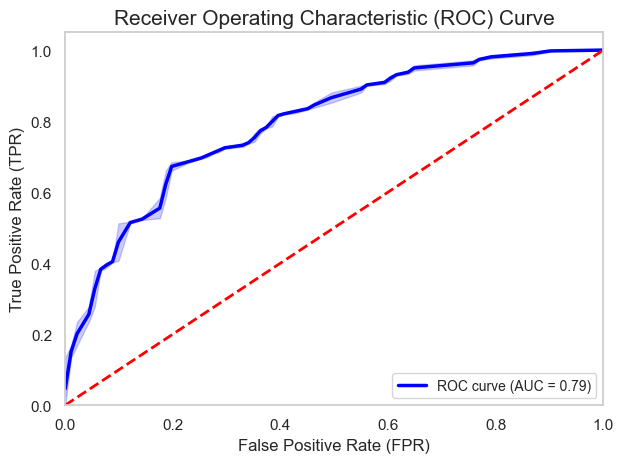

In [144]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr, tpr, thresholds = roc_curve(y_test, svc_model_1.decision_function(X_test))
roc_auc = auc(fpr, tpr)

# Set Seaborn style
sns.set(style='whitegrid')

# Plot ROC curve
sns.lineplot(x=fpr, y=tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})', linewidth=2.5)

# Plot diagonal line (no discrimination)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)

# Add labels and title with better formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])  # Slightly extend y-axis for aesthetics
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)

# Add a legend
plt.legend(loc="lower right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.grid(False)
plt.show()

#### Error rate and False Negative Rate vs Threshold:-

Since SVM cant output probabilities, therefore we have used the Decision Function of the SVM to plot this curve

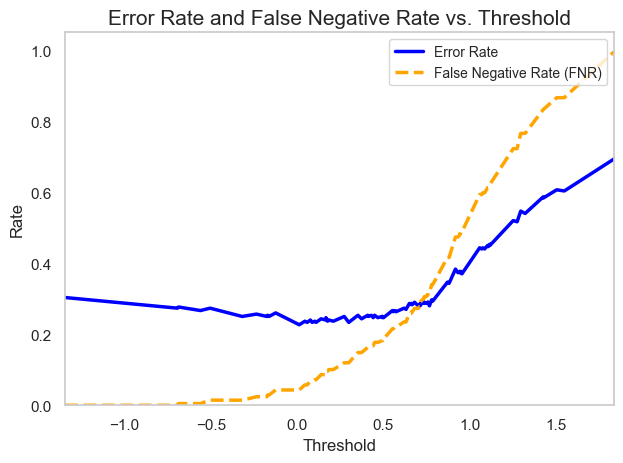

In [145]:
# Get decision function values from the SVM model (used to compute ROC curve)
decision_values = svc_model_1.decision_function(X_test)

# Compute ROC curve (fpr, tpr, thresholds)
fpr, tpr, thresholds = roc_curve(y_test, decision_values)

# Error rate is 1 - accuracy
# Accuracy = (TPR * P + (1 - FPR) * N) / Total
n_positives = y_test.sum()  # Number of positives (P)
n_negatives = len(y_test) - n_positives  # Number of negatives (N)
accuracy = (tpr * n_positives + (1 - fpr) * n_negatives) / len(y_test)
error_rate = 1 - accuracy

# False Negative Rate (FNR) is 1 - TPR
fnr = 1 - tpr

# Sanity check: Remove any NaN or Inf values from both arrays
valid_indices = np.isfinite(error_rate) & np.isfinite(thresholds)

# Set Seaborn style
sns.set(style='whitegrid')

# Plot Error Rate
sns.lineplot(x=thresholds[valid_indices], y=error_rate[valid_indices], color='blue', label='Error Rate', linewidth=2.5)

# Plot False Negative Rate (FNR) in a dashed line
sns.lineplot(x=thresholds[valid_indices], y=fnr[valid_indices], color='orange', label='False Negative Rate (FNR)', linestyle='--', linewidth=2.5)

# Add labels and title with better formatting
plt.xlim([thresholds[valid_indices].min(), thresholds[valid_indices].max()])
plt.ylim([0.0, 1.05])
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Rate', fontsize=12)
plt.title('Error Rate and False Negative Rate vs. Threshold', fontsize=15)

# Add a legend
plt.legend(loc="upper right", fontsize=10)

# Show the plot
plt.tight_layout()
plt.grid(False)
plt.show()

### Part-b:-

To find out, if our credit data is balanced, we check the no. of `Good` samples vs the no. of `Bad` samples

In [146]:
credit_data['Class'].value_counts()

Class
1    700
0    300
Name: count, dtype: int64

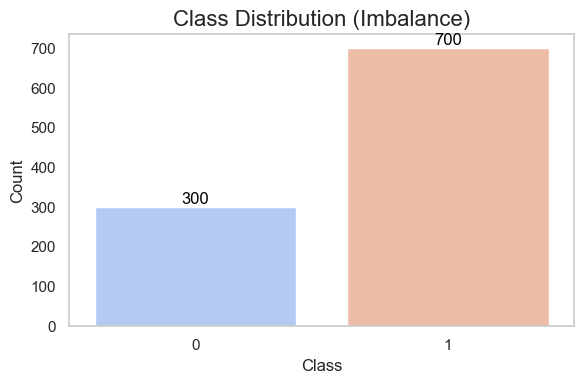

In [147]:
# Assuming 'credit_data' is your DataFrame and 'Class' is the column of interest
class_counts = credit_data['Class'].value_counts()

# Set Seaborn style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(6, 4))
bar_plot = sns.barplot(x=class_counts.index, y=class_counts.values, palette="coolwarm")

# Add labels and title
plt.title('Class Distribution (Imbalance)', fontsize=16)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Annotate the bars with the actual counts
for p in bar_plot.patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height(), f'{int(p.get_height())}', 
             ha='center', va='bottom', color='black', fontsize=12)

# Remove unnecessary grid lines and display the plot
plt.grid(False)
plt.tight_layout()
plt.show()

Clearly, the no. of Good transactions are more than the no. of Bad transactions. This is in accordng to our observations in real life as well. Majority of the transactions will be normal. However, some of them will be fradulent and the challenge is to identify them correctly. So, our dataset is an imbalanced dataset.

A confusion matrix can be useful for measuring performance on imbalanced datasets, as it provides insights into:

- True Positives (TP) and True Negatives (TN): Correctly classified examples of each class.
- False Positives (FP) and False Negatives (FN): Instances where the model incorrectly predicted a class, helping to assess whether the model is overpredicting the majority class.

However, additional metrics like Precision, Recall, and F1-score for both classes, and ROC AUC can provide more granular insights, especially for the minority class. Especially the FNR, which is also considered a very important metric from credit modelling point of view

Several techniques can be used to address class imbalance:

1. **Resampling Techniques:**
   - *Oversampling the minority class:* This increases the representation of the minority class by duplicating or synthesizing new instances (e.g., using the SMOTE technique).
   - *Undersampling the majority class:* Reducing the number of instances in the majority class to balance the dataset.

2. **Cost-Sensitive Learning:** Assign higher misclassification costs to the minority class to penalize the model more for incorrectly predicting it. Many algorithms like logistic regression, decision trees, or neural networks can be adjusted to account for class imbalance via cost-sensitive learning.
Use of Ensemble Methods:

3. Techniques like Random Forest and XGBoost can handle imbalanced data more effectively by focusing on different subsets of the data. The Balanced Random Forest algorithm, for example, resamples data at each split.
These methods can work because they address the core issue of data imbalance by either providing a more balanced dataset or training the model to pay more attention to the minority class, thereby improving prediction performance for the underrepresented class

#### Best Method: Resampling with SMOTE (Synthetic Minority Over-sampling Technique)
Why SMOTE?

- Balanced Data Representation: SMOTE synthesizes new samples for the minority class by interpolating between existing minority class points. This helps in creating a more balanced dataset without merely duplicating data.
- Improved Minority Class Prediction: By increasing the number of "Bad" class instances, SMOTE improves the model's ability to generalize and predict the minority class effectively, preventing it from being overwhelmed by the majority class.
- Avoids Overfitting: Oversampling the minority class using SMOTE is less prone to overfitting compared to simple duplication of data, which can introduce bias and redundancy.

In [148]:
# Import necessary libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [149]:
# Assuming 'credit_data' is already loaded and 'Class' is the target column
# Separate the features (X) and target (y)
X = credit_data.drop('Class', axis=1)  # Features
y = credit_data['Class']

# Encode the target labels (Good -> 1, Bad -> 0) for SMOTE
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [150]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Class distribution after SMOTE:
1    491
0    491
Name: count, dtype: int64


The dataset is now balanced with an equal number of `Good` and `Bad` classes, thanks to the application of SMOTE (Synthetic Minority Over-sampling Technique). By addressing the class imbalance, we are in a better position to perform a more robust analysis and confidently fit various machine learning models without the bias that often comes with imbalanced data.

In [151]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = model.predict(X_test)

# # Evaluate the model performance with corrected target names
target_names = list(le.classes_)  # Ensure it is a list

In [152]:
 # Generate and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.54      0.57        91
           1       0.81      0.84      0.82       209

    accuracy                           0.75       300
   macro avg       0.70      0.69      0.70       300
weighted avg       0.74      0.75      0.75       300

